#Visualizing Pixar's Roller Coaster

Data - PixarMovies.csv
- Year Released - the year the movie was released.
- Movie - the name of the movie.
- RT Score - the Rotten Tomatoes rating for the movie.
- IMDB Score - the IMDB rating for the movie.
- Metacritic SCore - the Metacritic rating for the movie.
- Opening Weekend - the amount of revenue the movie made on opening weekend (in millions of dollars).
- Worldwide Gross - the total amount of revenue the movie has made to date.
- Production Budget - the amount of money spent to produce the film (in millions of dollars).
- Oscars Won - the number of Oscar awards the movie won.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pixar_movies = pd.read_csv('PixarMovies.csv')

##Introduction to Data

In [8]:
pixar_movies.shape

(15, 16)

In [4]:
pixar_movies.head()

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
0,1995,Toy Story,81,100,8.3,92,29.14,362.0,191.8,356.21,170.2,52.98%,47.02%,30,3,0
1,1998,A Bug's Life,96,92,7.2,77,33.26,363.4,162.8,277.18,200.6,44.80%,55.20%,45,1,0
2,1999,Toy Story 2,92,100,7.9,88,57.39,485.0,245.9,388.43,239.2,50.70%,49.32%,90,1,0
3,2001,"Monsters, Inc.",90,96,8.1,78,62.58,528.8,255.9,366.12,272.9,48.39%,51.61%,115,3,1
4,2003,Finding Nemo,104,99,8.2,90,70.25,895.6,339.7,457.46,555.9,37.93%,62.07%,94,4,1


In [9]:
pixar_movies.dtypes

Year Released                int64
Movie                       object
Length                       int64
RT Score                     int64
IMDB Score                 float64
Metacritic Score             int64
Opening Weekend            float64
Worldwide Gross            float64
Domestic Gross             float64
Adjusted Domestic Gross    float64
International Gross        float64
Domestic %                  object
International %             object
Production Budget            int64
Oscars Nominated           float64
Oscars Won                 float64
dtype: object

In [10]:
pixar_movies.describe

<bound method DataFrame.describe of     Year Released                Movie  Length  RT Score  IMDB Score  \
0            1995            Toy Story      81       100         8.3   
1            1998         A Bug's Life      96        92         7.2   
2            1999          Toy Story 2      92       100         7.9   
3            2001       Monsters, Inc.      90        96         8.1   
4            2003         Finding Nemo     104        99         8.2   
5            2004      The Incredibles     115        97         8.0   
6            2006                 Cars     116        74         7.2   
7            2007          Ratatouille     111        96         8.0   
8            2008               WALL-E      97        96         8.4   
9            2009                   Up      96        98         8.3   
10           2010          Toy Story 3     103        99         8.4   
11           2011               Cars 2     113        39         6.3   
12           2012           

##Data Cleaning

Remove '%' from 'International %' and 'Domestic %' columns, and convert numbers to float

In [32]:
# for item in pixar_movies['Domestic %']:
#     pixar_movies['Domestic %'] = item.rstrip('%')

# for item in pixar_movies['International %']:
#     pixar_movies['International %'] = item.rstrip('%')

# pixar_movies['Domestic %'] = pixar_movies['Domestic %'].astype('float64')
# pixar_movies['International %'] = pixar_movies['International %'].astype('float64')

In [4]:
# Faster way
pixar_movies["Domestic %"] = pixar_movies["Domestic %"].str.rstrip("%").astype("float")
pixar_movies["International %"] = pixar_movies["International %"].str.rstrip("%").astype("float")

In [5]:
pixar_movies[['Domestic %', 'International %']].dtypes

Domestic %         float64
International %    float64
dtype: object

Multiply the IMDB Score column by 10 to convert it from a 10 point scale to a 100 point scale.

In [6]:
pixar_movies['IMDB Score'] = pixar_movies['IMDB Score'] * 10

Drop last row to remove NA values

In [7]:
filtered_pixar = pixar_movies.dropna()
filtered_pixar.shape

(14, 16)

Set index to be "Movie"

In [8]:
pixar_movies.set_index('Movie', inplace=True)
pixar_movies.head()

,Year Released,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
Movie,,,,,,,,,,,,,,,
Toy Story,1995,81,100,83,92,29.14,362.0,191.8,356.21,170.2,52.98,47.02,30,3,0
A Bug's Life,1998,96,92,72,77,33.26,363.4,162.8,277.18,200.6,44.80,55.20,45,1,0
Toy Story 2,1999,92,100,79,88,57.39,485.0,245.9,388.43,239.2,50.70,49.32,90,1,0
"Monsters, Inc.",2001,90,96,81,78,62.58,528.8,255.9,366.12,272.9,48.39,51.61,115,3,1
Finding Nemo,2003,104,99,82,90,70.25,895.6,339.7,457.46,555.9,37.93,62.07,94,4,1


In [9]:
filtered_pixar.set_index('Movie', inplace=True)
filtered_pixar.head()

,Year Released,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
Movie,,,,,,,,,,,,,,,
Toy Story,1995,81,100,83,92,29.14,362.0,191.8,356.21,170.2,52.98,47.02,30,3,0
A Bug's Life,1998,96,92,72,77,33.26,363.4,162.8,277.18,200.6,44.80,55.20,45,1,0
Toy Story 2,1999,92,100,79,88,57.39,485.0,245.9,388.43,239.2,50.70,49.32,90,1,0
"Monsters, Inc.",2001,90,96,81,78,62.58,528.8,255.9,366.12,272.9,48.39,51.61,115,3,1
Finding Nemo,2003,104,99,82,90,70.25,895.6,339.7,457.46,555.9,37.93,62.07,94,4,1


##Data Visualization - Line Plots

Now that the average reviews for each movie from the 3 major review sites are all on a 100 point scale, we can ask the question:

####"How do the Pixar films fare across each of the major review sites?"

I'll generate the following 3 line plots:

- Rotten Tomatoes score on the y-axis, movie name on the x-axis.
- IMDB score on the y-axis, movie name on the x-axis.
- Metacritic score on the y-axis, movie name on the x-axis.

I'll plot these line plots on the same plotting area so we can easily compare how each movie fared across the review sites.

In [10]:
critics_reviews = pixar_movies[['RT Score', 'IMDB Score', 'Metacritic Score']]
critics_reviews.head()

,RT Score,IMDB Score,Metacritic Score
Movie,,,
Toy Story,100,83,92
A Bug's Life,92,72,77
Toy Story 2,100,79,88
"Monsters, Inc.",96,81,78
Finding Nemo,99,82,90


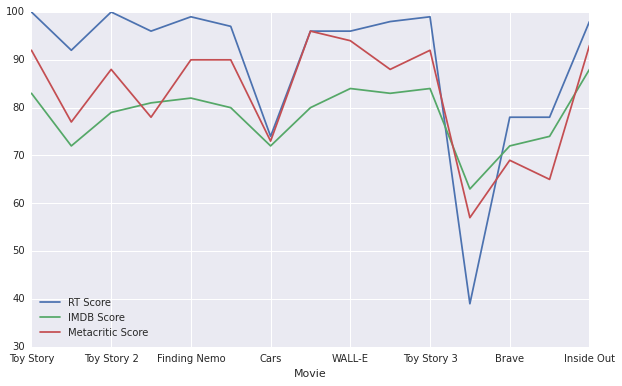

In [11]:
critics_reviews.plot(figsize=(10,6))

##Box Plots

####How are the average ratings from each review site across all the movies distributed?

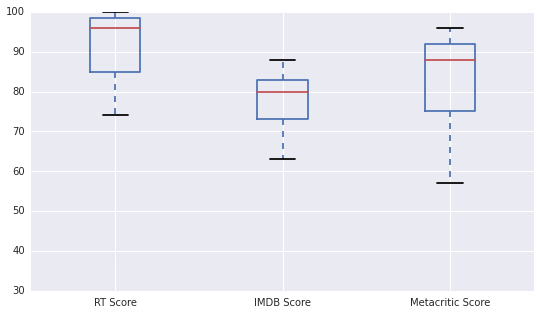

In [59]:
critics_reviews.plot(kind = 'box', figsize=(9,5))

Rotten Tomatoes gave the Pixar movie consistently higher ratings. It also looks like Metacritic's ratings for the Pixar movies are more spread out, ranging from right under 60 to right under 100.

##Bar Plots

####How has the ratio of where the revenue comes from changed since the first movie? Now that Pixar is more well known internationally, is more revenue being made internationally for newer movies?

In [60]:
revenue_proportions = filtered_pixar[['Domestic %', 'International %']]
revenue_proportions.head()

,Domestic %,International %
Movie,,
Toy Story,52.98,47.02
A Bug's Life,44.80,55.20
Toy Story 2,50.70,49.32
"Monsters, Inc.",48.39,51.61
Finding Nemo,37.93,62.07


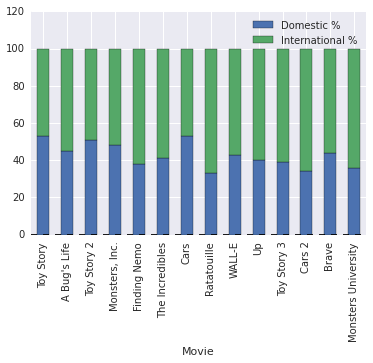

In [61]:
revenue_proportions.plot(kind='bar', stacked=True)

You'll notice that there's been a general decrease in the proportion of revenue that was made domestically.

####What is the correlation between the number of Oscars a movie was nominated for and the number it actually won.

In [62]:
oscars = filtered_pixar[['Oscars Nominated', 'Oscars Won']]

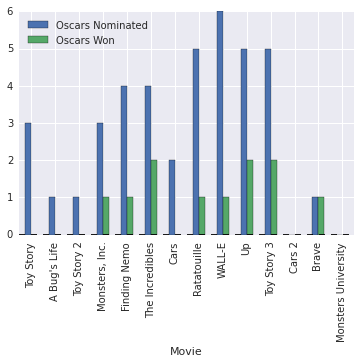

In [64]:
oscars.plot(kind='bar')

####What plots can be generated to better understand which columns correlate with the Adjusted Domestic Gross revenue column?

In [12]:
filtered_pixar.head()

,Year Released,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
Movie,,,,,,,,,,,,,,,
Toy Story,1995,81,100,83,92,29.14,362.0,191.8,356.21,170.2,52.98,47.02,30,3,0
A Bug's Life,1998,96,92,72,77,33.26,363.4,162.8,277.18,200.6,44.80,55.20,45,1,0
Toy Story 2,1999,92,100,79,88,57.39,485.0,245.9,388.43,239.2,50.70,49.32,90,1,0
"Monsters, Inc.",2001,90,96,81,78,62.58,528.8,255.9,366.12,272.9,48.39,51.61,115,3,1
Finding Nemo,2003,104,99,82,90,70.25,895.6,339.7,457.46,555.9,37.93,62.07,94,4,1


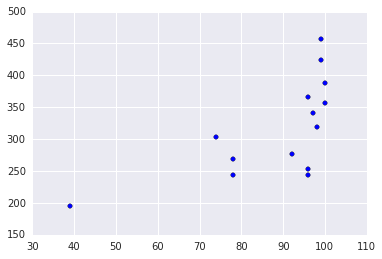

In [14]:
plt.scatter(filtered_pixar['RT Score'], filtered_pixar['Adjusted Domestic Gross'])

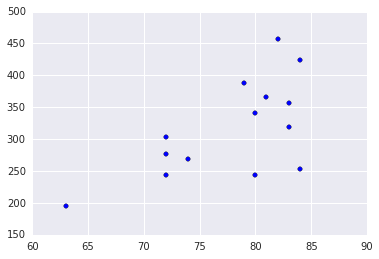

In [15]:
plt.scatter(filtered_pixar['IMDB Score'], filtered_pixar['Adjusted Domestic Gross'])

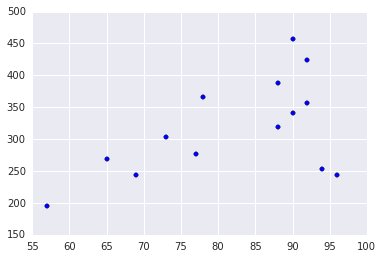

In [16]:
plt.scatter(filtered_pixar['Metacritic Score'], filtered_pixar['Adjusted Domestic Gross'])

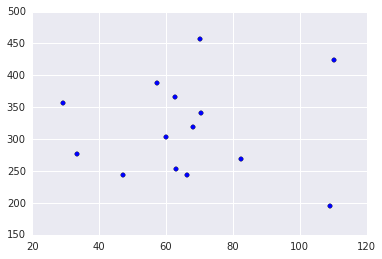

In [17]:
plt.scatter(filtered_pixar['Opening Weekend'], filtered_pixar['Adjusted Domestic Gross'])

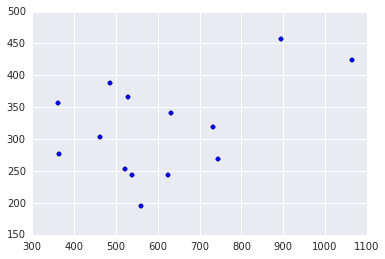

In [18]:
plt.scatter(filtered_pixar['Worldwide Gross'], filtered_pixar['Adjusted Domestic Gross'])

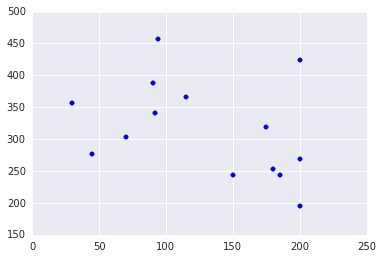

In [19]:
plt.scatter(filtered_pixar['Production Budget'], filtered_pixar['Adjusted Domestic Gross'])

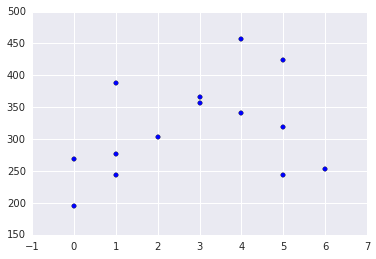

In [20]:
plt.scatter(filtered_pixar['Oscars Nominated'], filtered_pixar['Adjusted Domestic Gross'])

Adjusted Domestic Gross has best correlation with IMDB score